In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [49]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042], [10.791],
                    [5.313], [7.997], [3.1]], dtype=np.float32)
x_train

array([[ 3.3  ],
       [ 4.4  ],
       [ 5.5  ],
       [ 6.71 ],
       [ 6.93 ],
       [ 4.168],
       [ 9.779],
       [ 6.182],
       [ 7.59 ],
       [ 2.167],
       [ 7.042],
       [10.791],
       [ 5.313],
       [ 7.997],
       [ 3.1  ]], dtype=float32)

In [50]:
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827], [3.465],
                    [1.65], [2.904], [1.3]], dtype=np.float32)


In [51]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [52]:
class SimpleLinearRegression(nn.Module):
    def __init__(self):
        super(SimpleLinearRegression,self).__init__()
        self.linear = nn.Linear(1,1)
    def forward(self,x):
        out = self.linear(x)
        return out

In [53]:
model = SimpleLinearRegression()

In [54]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr = 0.01)

In [55]:
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = x_train
    targets = y_train

In [56]:
outputs = model(inputs)
loss = criterion(outputs,targets)

In [57]:
optimizer.zero_grad()
loss.backward()
optimizer.step()

In [58]:
if (epoch+1) % 50 == 0:
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1000/1000], Loss: 12.1543


In [59]:
model.eval()
with torch.no_grad():
    predicted = model(x_train)
    print('Predicted:', predicted.detach().numpy())

Predicted: [[1.7618666]
 [2.1523216]
 [2.5427766]
 [2.9722772]
 [3.050368 ]
 [2.069971 ]
 [4.0616465]
 [2.7848587]
 [3.2846413]
 [1.3596978]
 [3.0901234]
 [4.420865 ]
 [2.4763992]
 [3.4291096]
 [1.6908746]]


In [60]:
mat1 = torch.tensor([[1, 2], [3, 4]])  
mat2 = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)  

In [61]:
mat2 = mat2.to(mat1.dtype)

In [62]:
result = torch.matmul(mat1, mat2)

In [63]:
result

tensor([[19, 22],
        [43, 50]])

In [65]:
import matplotlib.pyplot as plt

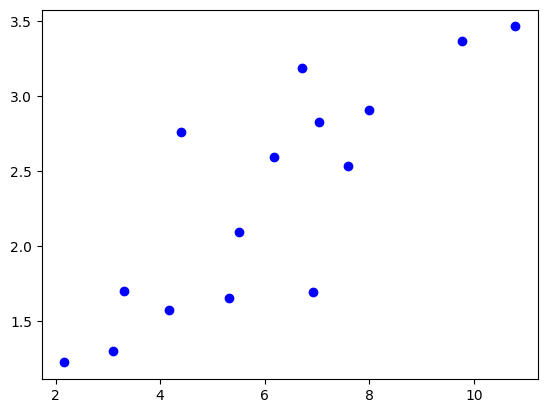

In [66]:
plt.scatter(x_train.numpy(), y_train.numpy(), color='blue', label='Actual')

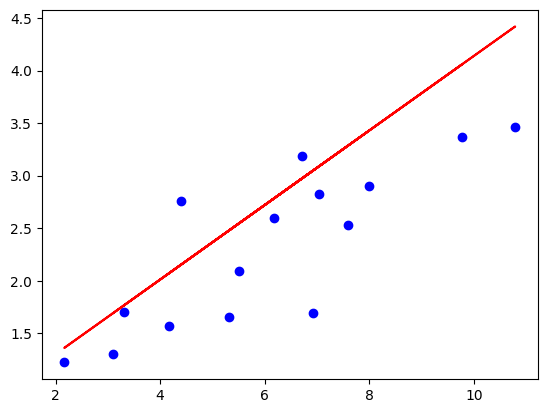

In [78]:
model.eval()
with torch.no_grad():
    predicted = model(x_train)
    plt.plot(x_train.numpy(), predicted.numpy(), color='red', label='Predicted')
   

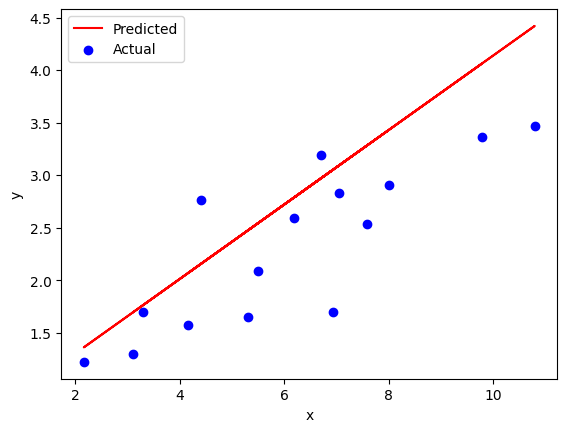

In [80]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_train.numpy(), predicted.numpy(), color='red', label='Predicted')
plt.scatter(x_train.numpy(), y_train.numpy(), color='blue', label='Actual')
plt.legend()
plt.show()